In [3]:
import torch

In [124]:
# homework 1
x = torch.tensor(1.0)
x.requires_grad_(True)

y = 3*x**2 + 2*x + 1
print('y = ', y)
y.backward()
print('dy/dx = ', x.grad)


y =  tensor(6., grad_fn=<AddBackward0>)
dy/dx =  tensor(8.)


In [125]:
# homework 2
import matplotlib.pyplot as plt
import numpy as np

data_x = torch.rand((100, 1))
data_y = torch.rand((100, 1))

data_x = torch.sort(data_x, dim = 0)
data_y = torch.sort(data_y, dim = 0)

data_x = torch.tensor(data_x.values)
data_y = torch.tensor(data_y.values)


<ipython-input-125-d2bfd23acd76>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_x = torch.tensor(data_x.values)
<ipython-input-125-d2bfd23acd76>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_y = torch.tensor(data_y.values)


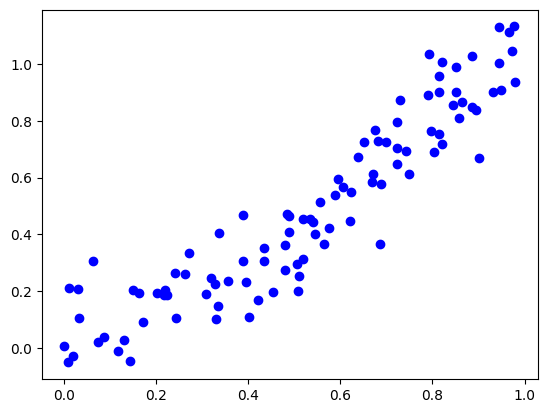

In [126]:
noise = torch.randn(data_y.size()) / 10
data_y = data_y + noise

plt.scatter(data_x, data_y, c = 'blue')
plt.show()

In [127]:
class LinearRegression(torch.nn.Module):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear = torch.nn.Linear(1, 1)

  def forward(self, x):
    predict_y = self.linear(x)
    return predict_y

In [128]:
linear_model = LinearRegression()
criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(linear_model.parameters(), lr = 0.007)

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [129]:
for epoch in range(101):
  predict_y = linear_model(data_x)
  loss = criterion(predict_y, data_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch % 5 == 0):
    print('epoch: {}, loss: {}'.format(epoch, loss.item()))

epoch: 0, loss: 18.601184844970703
epoch: 5, loss: 6.07393741607666
epoch: 10, loss: 3.0241005420684814
epoch: 15, loss: 2.0656981468200684
epoch: 20, loss: 1.712401270866394
epoch: 25, loss: 1.5724165439605713
epoch: 30, loss: 1.5153969526290894
epoch: 35, loss: 1.491940975189209
epoch: 40, loss: 1.4822583198547363
epoch: 45, loss: 1.4782568216323853
epoch: 50, loss: 1.47660231590271
epoch: 55, loss: 1.4759182929992676
epoch: 60, loss: 1.4756354093551636
epoch: 65, loss: 1.4755184650421143
epoch: 70, loss: 1.4754698276519775
epoch: 75, loss: 1.475450038909912
epoch: 80, loss: 1.4754416942596436
epoch: 85, loss: 1.4754382371902466
epoch: 90, loss: 1.475436806678772
epoch: 95, loss: 1.4754363298416138
epoch: 100, loss: 1.4754360914230347


In [130]:
test_input = torch.rand((1, 1))
test_input

tensor([[0.5068]])

In [131]:
predict_output = linear_model(test_input)
print('Predict output: ', predict_output.item())

Predict output:  0.4652361571788788


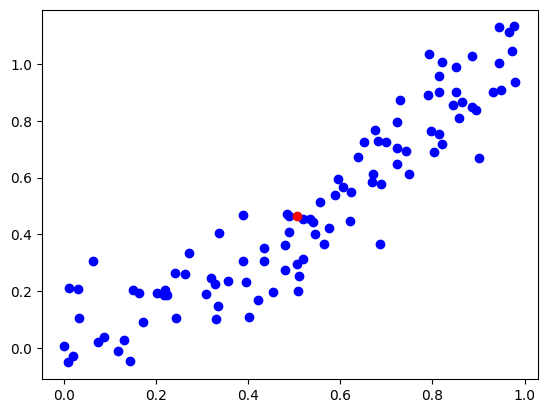

In [132]:
plt.scatter(data_x, data_y, c = 'blue')
plt.scatter(test_input.item(), predict_output.item(), c = 'red')
plt.show()

In [138]:
# homework 3
from torch.utils.data import Dataset

class TestDataset(Dataset):
  def __init__(self, size:int):
    self.x = torch.rand(size)
    self.y = 2 * self.x

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    return self.x[index], self.y[index]

In [139]:
from torch.utils.data import DataLoader

def collate_fn(batch):
  x_list = []
  y_list = []

  for x, y in batch:
    x_list.append([x])
    y_list.append([y])

  return [torch.tensor(x_list), torch.tensor(y_list)]

In [140]:
test_dataset = TestDataset(10)
print(len(test_dataset))
print(test_dataset[0])

10
(tensor(0.4206), tensor(0.8411))


In [141]:
batch_size = 2

test_dataloader = DataLoader(
    test_dataset,
    batch_size = batch_size,
    shuffle = True,
    collate_fn = collate_fn
)

In [142]:
index = 0
for x, y in test_dataloader:
  print('Mini batch {}:'.format(index))
  stack = torch.stack((x, y), dim = 1).reshape((-1, 2))

  for i in range(len(stack)):
    print('Data {}\nx = {}\ny = {}'.format(i, stack[i][0], stack[i][1]))

  index = index + 1
  print()


Mini batch 0:
Data 0
x = 0.4205533266067505
y = 0.841106653213501
Data 1
x = 0.634811520576477
y = 1.269623041152954

Mini batch 1:
Data 0
x = 0.8396157026290894
y = 1.6792314052581787
Data 1
x = 0.16296297311782837
y = 0.32592594623565674

Mini batch 2:
Data 0
x = 0.294700562953949
y = 0.589401125907898
Data 1
x = 0.6393159627914429
y = 1.2786319255828857

Mini batch 3:
Data 0
x = 0.7944396734237671
y = 1.5888793468475342
Data 1
x = 0.04343104362487793
y = 0.08686208724975586

Mini batch 4:
Data 0
x = 0.5846952199935913
y = 1.1693904399871826
Data 1
x = 0.09578776359558105
y = 0.1915755271911621

